# 03 - Deploy

In [14]:
import boto3
import sagemaker
import time
from time import strftime

boto_session = boto3.Session()
sagemaker_session = sagemaker.Session(boto_session=boto_session)
sm_client = boto3.client("sagemaker")
region = boto_session.region_name
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
account = sagemaker_session.boto_session.client("sts").get_caller_identity()["Account"]

prefix = 'sagemaker-intel2-dvc'

print(f"account: {account}")
print(f"bucket: {bucket}")
print(f"region: {region}")
print(f"role: {role}")

account: 991979990579
bucket: sagemaker-ap-south-1-991979990579
region: ap-south-1
role: arn:aws:iam::991979990579:role/service-role/AmazonSageMaker-ExecutionRole-20221229T112379


In [2]:
import boto3
import sagemaker
import time
from time import strftime

In [3]:
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import TensorBoardOutputConfig

## Deploy to Endpoint

In [4]:
from sagemaker.pytorch import PyTorchModel
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer

Get the `model_data` from the models uploaded to S3 of the aboved training

Once your debugging is done, it's better to simply call `pt_estimator.deploy`

In [8]:
model = PyTorchModel(
    entry_point="infer.py",
    source_dir="/root/Sagemaker-Pipeline",
    role=get_execution_role(),
    model_data="s3://sagemaker-ap-south-1-991979990579/training-intel-dataset-2023-02-12-20-45-06-283/output/model.tar.gz",
    framework_version="1.12.0",
    py_version="py38",
)

In [7]:
!pwd

/root/Sagemaker-Pipeline/notebooks


In [9]:
predictor = model.deploy(
    initial_instance_count=1,
    instance_type="ml.t2.medium",
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer(),
)

---------!

## Predictor

In [12]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from sagemaker.pytorch import PyTorchPredictor

Predictor is also not needed to be created again, but today we want to be verbose

In [15]:
predictor_new = PyTorchPredictor(
    endpoint_name="pytorch-inference-2023-02-12-21-08-32-254",
    sagemaker_session=sagemaker_session,
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer(),
)

In [16]:
def predict(source):
    if "http" in source:
        response = requests.get(source)
        im = Image.open(BytesIO(response.content))
    else:
        im = Image.open(source).convert("RGB")

    inputs = {"inputs": np.array(im)}

    out = predictor_new.predict(inputs)
    print(out)
    im.show()

{'buildings': 0.9983773231506348, 'sea': 0.0008056288352236152, 'glacier': 0.0004966597771272063, 'street': 0.00026513251941651106, 'forest': 3.5382265195949e-05}


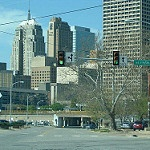

In [18]:
predict(
    "/root/Sagemaker-Pipeline/Images/building1.jpg"
)

{'buildings': 0.9897504448890686, 'street': 0.007851261645555496, 'glacier': 0.0009653251618146896, 'forest': 0.0007169833406805992, 'sea': 0.0004463098885025829}


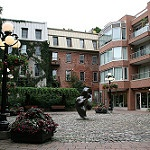

In [19]:
predict(
    "/root/Sagemaker-Pipeline/Images/building2.jpg"
)

{'forest': 0.9997069239616394, 'glacier': 0.00014056399231776595, 'mountain': 5.062143100076355e-05, 'street': 4.2268933611921966e-05, 'buildings': 3.41728882631287e-05}


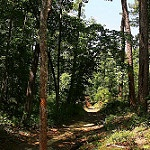

In [20]:
predict(
    "/root/Sagemaker-Pipeline/Images/forest1.jpg"
)

{'forest': 0.9998847246170044, 'glacier': 4.8581994633423164e-05, 'sea': 3.2483301765751094e-05, 'buildings': 1.3606854736281093e-05, 'street': 1.1363771591277327e-05}


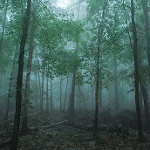

In [21]:
predict(
    "/root/Sagemaker-Pipeline/Images/forest2.jpg"
)

{'glacier': 0.9999946355819702, 'sea': 3.919369191862643e-06, 'mountain': 7.697987598476175e-07, 'forest': 5.027918632549699e-07, 'street': 8.418697206025172e-08}


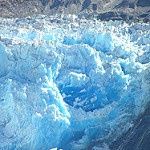

In [22]:
predict(
    "/root/Sagemaker-Pipeline/Images/glacier1.jpg"
)

{'glacier': 0.9999932050704956, 'sea': 5.526444965653354e-06, 'forest': 8.083675879788643e-07, 'mountain': 4.308194831992296e-07, 'buildings': 6.946360286974596e-08}


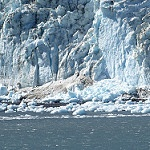

In [23]:
predict(
    "/root/Sagemaker-Pipeline/Images/glacier2.jpg"
)

{'mountain': 0.9940419793128967, 'glacier': 0.0027540780138224363, 'sea': 0.002281456720083952, 'forest': 0.000693852489348501, 'street': 0.000138074072310701}


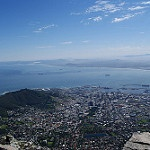

In [24]:
predict(
    "/root/Sagemaker-Pipeline/Images/mountain1.jpg"
)

{'mountain': 0.9997217059135437, 'glacier': 0.0002693981514312327, 'sea': 4.4689318201562855e-06, 'forest': 2.2424212602345506e-06, 'buildings': 1.1896410114786704e-06}


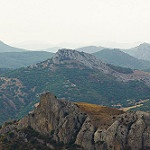

In [25]:
predict(
    "/root/Sagemaker-Pipeline/Images/mountain2.jpg"
)

{'sea': 0.9965425133705139, 'mountain': 0.002363542327657342, 'glacier': 0.0006599469343200326, 'forest': 0.00026346443337388337, 'buildings': 0.00010248817852698267}


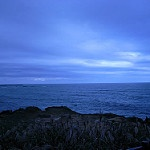

In [26]:
predict(
    "/root/Sagemaker-Pipeline/Images/sea1.jpg"
)

{'sea': 0.9996035695075989, 'glacier': 0.00039475708035752177, 'forest': 1.1217950941500021e-06, 'street': 3.531753804963955e-07, 'mountain': 1.6389240897751733e-07}


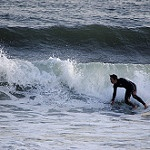

In [27]:
predict(
    "/root/Sagemaker-Pipeline/Images/sea2.jpg"
)

{'street': 0.9986056685447693, 'forest': 0.0007670197519473732, 'glacier': 0.00026373384753242135, 'mountain': 0.00016919062181841582, 'sea': 0.00012197283649584278}


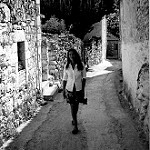

In [28]:
predict(
    "/root/Sagemaker-Pipeline/Images/street1.jpg"
)

{'street': 0.9999774694442749, 'buildings': 1.0248842954752035e-05, 'glacier': 7.2157354225055315e-06, 'sea': 2.6778498067869805e-06, 'mountain': 1.3822327673551627e-06}


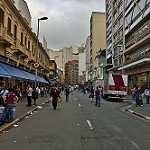

In [29]:
predict(
    "/root/Sagemaker-Pipeline/Images/street2.jpg"
)